# LUAD CPTAC analysis

In [2]:
import pandas as pd
import numpy as np
import pickle
from scipy.stats import zscore
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from msresist.figures.figure3 import plotR2YQ2Y, plotPCA
from msresist.figures.figure1 import pca_dfs, plotClustergram
from msresist.figures.figureM1 import plotErrorAcrossMissingnessLevels, plotWinsAcrossMissingnessLevels, plotMissingnessDensity, plotErrorAcrossNumberOfClusters, plotErrorAcrossWeights
from msresist.logistic_regression import plotClusterCoefficients, plotPredictionProbabilities, plotConfusionMatrix
from msresist.pre_processing import preprocessing, filter_NaNpeptides, MeanCenter, Log2T
from msresist.clustering import MassSpecClustering
from msresist.motifs import MapMotifs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000000)
# pd.set_option('display.max_columns', 1000)

## 1. Import and Preprocess Data

In [5]:
# X = preprocessing(CPTAC=True, log2T=True)
X = pd.read_csv("msresist/data/MS/CPTAC/CPTAC-preprocessedMotfis.csv").iloc[:, 1:]

d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

In [6]:
X.head()

,Sequence,Protein,Gene,Position,C3N.01799,C3N.01799.N,C3L.01890,C3L.01890.N,C3N.00572,C3N.00572.N,C3N.02423,C3N.02423.N,C3N.02729,C3N.02729.N,C3L.00263,...,C3N.00738,C3N.00738.N,C3N.00959,C3N.00959.N,C3N.02003,C3N.02003.N,C3N.02379.N,C3N.00175,C3N.00175.N,C3N.01823,C3N.01823.N,C3L.02549,C3L.02549.N,C3L.02365,C3L.02365.N
0,AAAAAsGGGVS,NP_002577.2,PBX2,S146-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAAAAsQQGSA,NP_001308122.1,TBL1XR1,S119-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071547,-0.600298,0.172339,-1.761406,0.421872,-0.372907,-0.979491,-0.083036,-0.361962,1.275506,-0.568015,0.25423,-0.378522,0.987749,-0.189486
2,AAAAAsTQAQQ,NP_001035540.1,MINDY2,S575-p,0.012034,-0.630863,-1.159479,-0.740044,0.107228,-0.016971,-0.023379,-0.481045,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAGsASPRS,NP_064520.2,WRNIP1,S151-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAAGsGPSPP,NP_060895.1,PI4K2A,S44-p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83783,-0.993838,0.317079,...,0.031572,-0.554645,-0.033640,-1.268642,0.266790,-0.063300,-0.647500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Wd = White_X.iloc[:, 2:].T
# Wi = White_X.iloc[:, :2]

In [8]:
# w_model = MassSpecClustering(Wi, ncl, SeqWeight=SeqWeight, distance_method=distance_method, n_runs=1).fit(Wd, "NA")

In [9]:
# Wcenters = w_model.transform(Wd).T

In [10]:
# Wcenters.columns = Xd.index
# plotClustergram(Wcenters.T, "White", max(np.max(np.abs(Wcenters))) * 0.9, figsize=(6,6), yticklabels=True)

#### Cluster Averages

In [11]:
# Wcenters = Wcenters.T
# Wcenters["Patient_ID"] = X_white.columns[2:]
# Wcenters.iloc[:, :-1] = zscore(Wcenters.iloc[:, :-1], axis=1)
# c=2

In [12]:
# fig, ax = plt.subplots(1, 2, figsize=(12,5))
# plotPCA(ax, Wcenters, c, ["Patient_ID"], "Cluster", hue_scores="Patient_ID", hue_load="Cluster", legendOut=False)

## 3. Distribution of Missingness

In [13]:
# fig, ax = plt.subplots(1, 1, figsize=(7,6))
# plotMissingnessDensity(ax, d)

## 4. Artificial Missingness Error across Missingness Percentages

Introduce artificial missing data by leaving values out, and then seeing how well that values are represented by the corresponding clusters.

In [14]:
# %%time

# fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharey=True)
# m_ = plotErrorAcrossMissingnessLevels(ax, X, 0.1, [0, 0.35, 2], "PAM250", 5, 200, baseline=True)

See how the wins behave in each fitted model across missingness % and per weight:

In [15]:
# fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
# plotWinsAcrossMissingnessLevels(ax, m_.copy(), [0, 0.35, 2])

## 5. Missingness Error across Number of Clusters or Different Weights

In [16]:
from msresist.figures.figureM1 import FindIdxValues, IncorporateMissingValues

Re-initialize GMM, NaN responsibilities at iteration 2
Re-initialize GMM, NaN responsibilities at iteration 1
Re-initialize GMM, NaN responsibilities at iteration 3
Re-initialize GMM, NaN responsibilities at iteration 5
Re-initialize GMM, NaN responsibilities at iteration 7
Re-initialize GMM, NaN responsibilities at iteration 1
Re-initialize GMM, NaN responsibilities at iteration 3
CPU times: user 58min 16s, sys: 8min 30s, total: 1h 6min 46s
Wall time: 3h 14min 24s


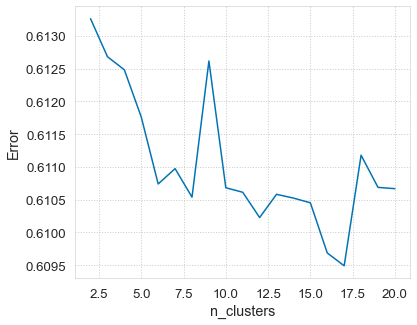

In [17]:
%%time
fig, ax = plt.subplots(1,1,figsize=(6,5))
plotErrorAcrossNumberOfClusters(ax, X, 0.1, 0.45, "PAM250", np.arange(2, 21), 200)

In [58]:
# %%time
# fig, ax = plt.subplots(1,1,figsize=(6,5))
# plotErrorAcrossWeights(ax, X, 0.1, [0, 0.1, 0.25, 0.5, 0.75, 1, 2], "PAM250", 10, 200)

## 6. Run Model

Filter peptides based on a threshold of missingness

In [59]:
X_f = filter_NaNpeptides(X, cut=0.1)
X_f.index = np.arange(X_f.shape[0])
d_f = X_f.select_dtypes(include=['float64']).T
i_f = X_f.select_dtypes(include=['object'])

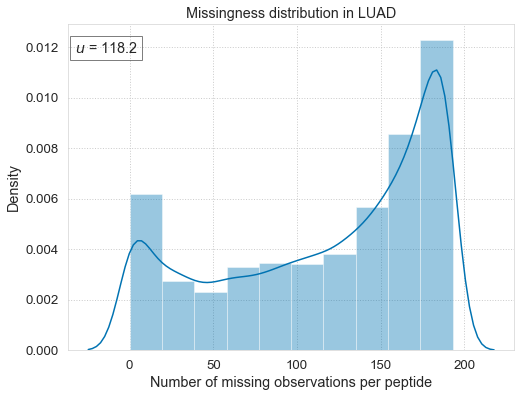

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plotMissingnessDensity(ax, d_f)

Reduce data set:

In [69]:
# Reduce data set?
# npept = 2000
# d_r = d_f.iloc[:, :npept]
# i_r = i_f.iloc[:npept, :]

#Drop NaN?
# d = d.iloc[:8, :].dropna(axis=1)
# i = i.iloc[d.columns, :]

Run model:

In [70]:
%%time
distance_method = "PAM250"
ncl = 15
SeqWeight = 0

MSC = MassSpecClustering(i_f, ncl, SeqWeight=SeqWeight, distance_method=distance_method, n_runs=1).fit(d_f, "NA")

CPU times: user 3min 17s, sys: 10.6 s, total: 3min 27s
Wall time: 5min 20s


Save model:

In [43]:
# with open('CPTACmodel_PAM250_W020_15CL', 'wb') as f:
#     pickle.dump([MSC], f)

Load if necessary:

In [41]:
with open('CPTACmodel_PAM250_W020_15CL', 'rb') as f:
    MSC = pickle.load(f)[0]

In [42]:
MSC.wins_

'SeqWins: 21823 DataWins: 1637 BothWin: 918 MixWin: 888'

### Hierarchical Clustering

In [45]:
centers = MSC.transform(d_f)
centers["Patient_ID"] = X.columns[4:]
centers.iloc[:, :-1] = zscore(centers.iloc[:, :-1], axis=1)

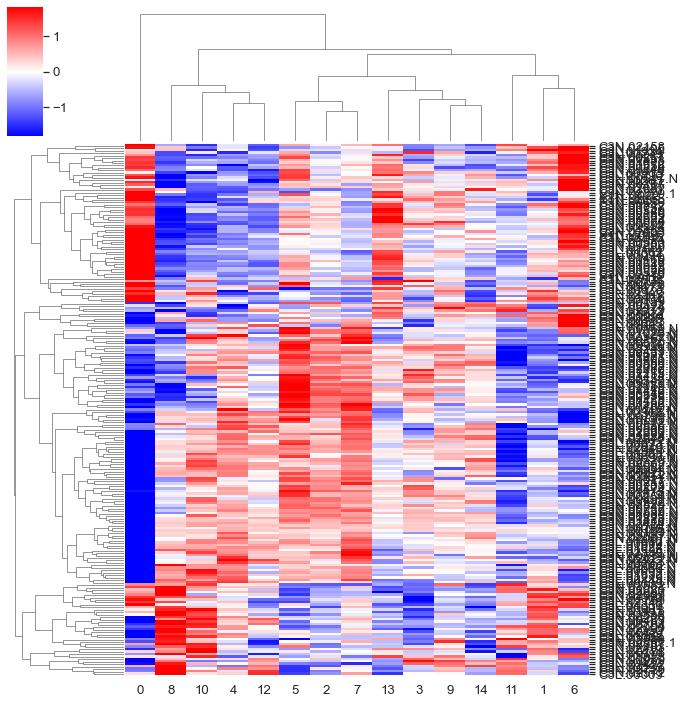

In [46]:
centers = centers.set_index(["Patient_ID"])
plotClustergram(centers, "", lim=max(np.max(np.abs(centers)) * 0.5), figsize=(10, 10), yticklabels=True)
centers = centers.reset_index()
# plt.savefig("CPTAC_GMM.svg", bbox_inches='tight', format='svg', dpi=1200)

### PCA Analysis

In [47]:
centers = TumorType(centers)
c = 2

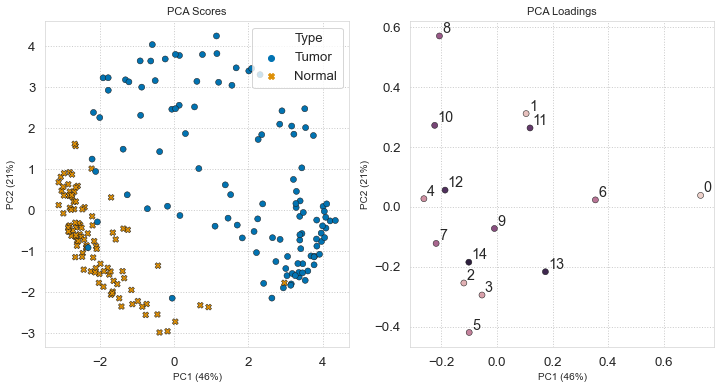

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plotPCA(ax, centers, c, ["Patient_ID", "Type"], "Cluster", hue_scores="Type", style_scores="Type", hue_load="Cluster")

## 7. Regression against Clinical Features

In [49]:
centers, y = TransformCPTACdataForRegression(MSC, d_f, list(X.columns[4:]))

### PLSR

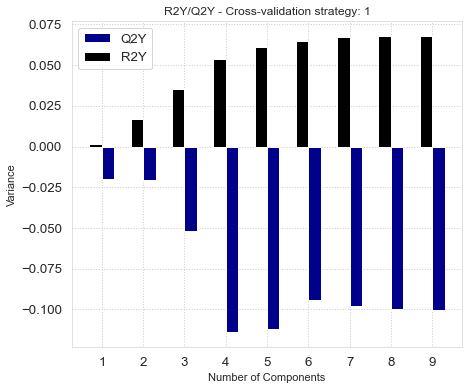

In [50]:
p10 = PLSRegression(n_components=2, scale=True)
fig, ax = plt.subplots(1, 1, figsize=(7,6))
plotR2YQ2Y(ax, p10, centers.iloc[:, 1:], y.iloc[:, 1], 1, 10)
# plt.savefig("CPTAC_GMM.svg", bbox_inches='tight', format='svg', dpi=1200)

### Logistic Regression

#### All samples (tumor and normal):

In [65]:
dd = centers.iloc[:, 1:]
yy = y.iloc[:, 1]

# lr = LogisticRegressionCV(cv=ncl, class_weight='balanced', Cs=200, solver="saga", penalty="l1").fit(dd, yy)
lr = LogisticRegressionCV(cv=ncl, class_weight='balanced', solver="saga", penalty="l1", Cs=5).fit(dd, yy)
y_pred = lr.predict(dd)
print(y_pred)

lr_score = lr.score(dd, yy)
print(lr_score)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1.]
0.6984924623115578


#### Coefficients

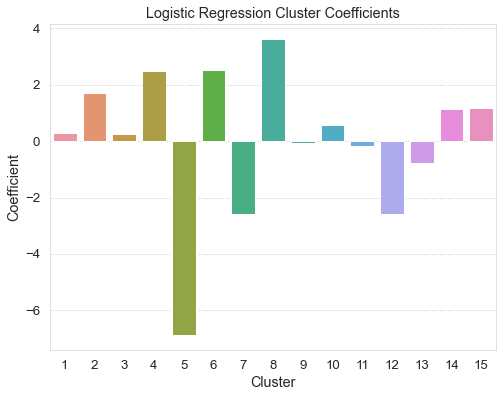

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plotClusterCoefficients(ax, lr)

Input, Output, and Classification results:
- Logit

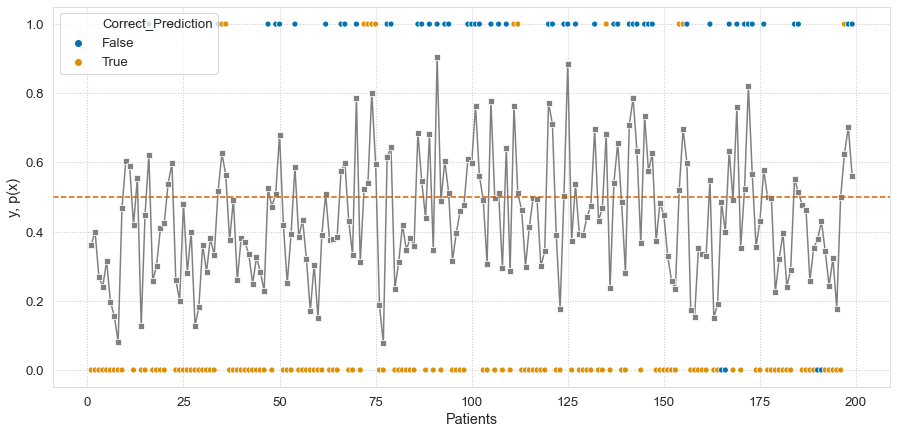

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plotPredictionProbabilities(ax, lr, y_pred, dd, yy)

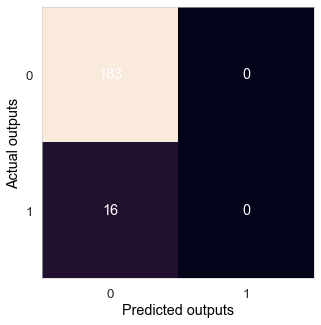

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
plotConfusionMatrix(ax, lr, dd, yy)

#### Tumor only:

In [55]:
centers_T = centers[~centers["Patient_ID"].str.endswith(".N")].set_index("Patient_ID")
y_T = y[~y["Patient_ID"].str.endswith(".N")].set_index("Patient_ID").iloc[:, 0]

In [56]:
lr_T = LogisticRegressionCV(cv=ncl, class_weight='balanced', solver="saga", penalty="l1").fit(centers_T, y_T)
y_pred_T = lr_T.predict(centers_T)
print(y_pred_T)

lr_score_T = lr_T.score(centers_T, y_T)
print(lr_score_T)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0.]
0.7692307692307693


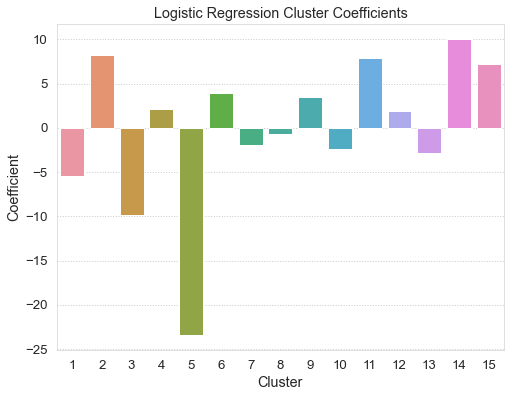

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plotClusterCoefficients(ax, lr_T)

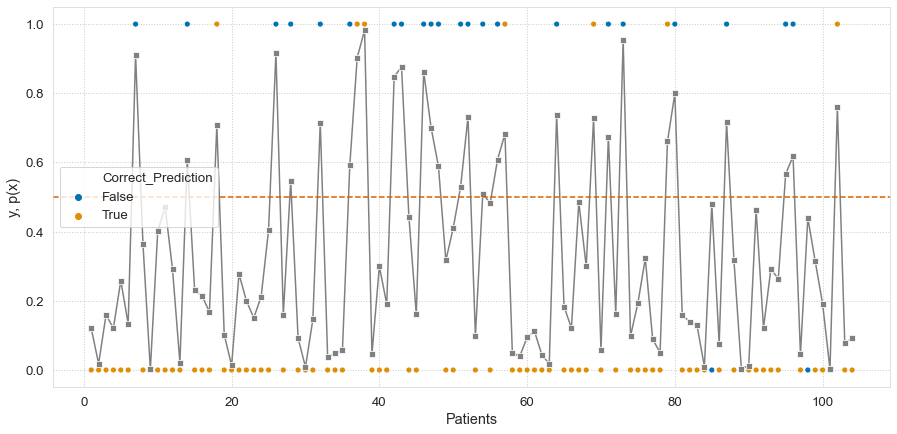

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plotPredictionProbabilities(ax, lr_T, y_pred_T, centers_T, y_T)

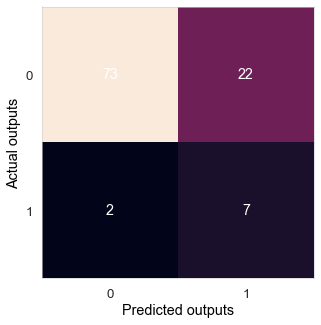

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
plotConfusionMatrix(ax, lr_T, centers_T, y_T)

#### Normal only:

In [60]:
centers_N = centers[centers["Patient_ID"].str.endswith(".N")].set_index("Patient_ID")
y_N = y[y["Patient_ID"].str.endswith(".N")].set_index("Patient_ID").iloc[:, 0]

In [61]:
lr_N = LogisticRegressionCV(cv=ncl, class_weight='balanced').fit(centers_N, y_N)
y_pred_N = lr.predict(centers_N)
print(y_pred_N)

lr_score_N = lr.score(centers_N, y_N)
print(lr_score_N)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.9263157894736842


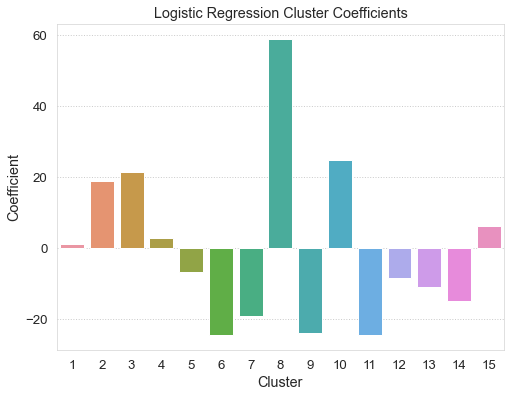

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plotClusterCoefficients(ax, lr_N)

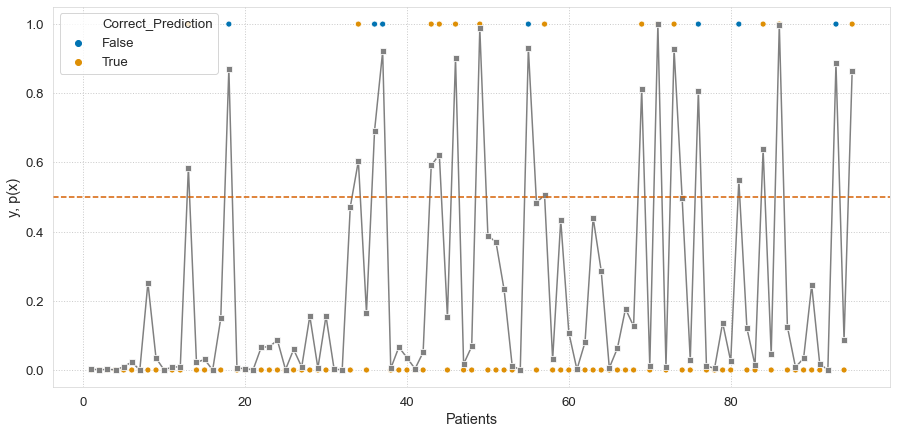

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plotPredictionProbabilities(ax, lr_N, y_pred_N, centers_N, y_N)

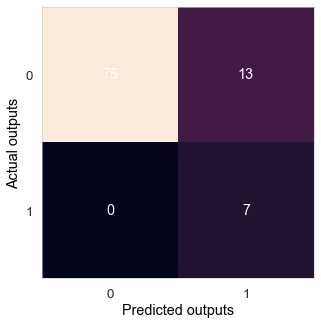

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
plotConfusionMatrix(ax, lr_N, centers_N, y_N)